Sabrina Shafwa 2106632756


In [1]:
# import modul-modul yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
#import data
df = pd.read_csv('/content/Car_sales.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
#melihat banyak data dan fitur
df.shape

(157, 16)

In [4]:
df["Manufacturer"].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [5]:
df[["Manufacturer","Model"]]

,Manufacturer,Model
0,Acura,Integra
1,Acura,TL
2,Acura,CL
3,Acura,RL
4,Audi,A4
...,...,...
152,Volvo,V40
153,Volvo,S70
154,Volvo,V70
155,Volvo,C70


Pre Processing

In [6]:
#Melihat jumlah, mean, std, min, max, persentil data
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [8]:
#mengetahui tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [9]:
#pendefinisian kolom_dihapus
kolom_dihapus = ['Manufacturer', 'Model','Vehicle_type','Latest_Launch']

In [10]:
#menghapus kolom
df_dihapus = df.drop(labels=kolom_dihapus, axis=1)
print(df_dihapus)

     Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0                16.919               16.360               21.50          1.8   
1                39.384               19.875               28.40          3.2   
2                14.114               18.225                 NaN          3.2   
3                 8.588               29.725               42.00          3.5   
4                20.397               22.255               23.99          1.8   
..                  ...                  ...                 ...          ...   
152               3.545                  NaN               24.40          1.9   
153              15.245                  NaN               27.50          2.4   
154              17.531                  NaN               28.80          2.4   
155               3.493                  NaN               45.50          2.3   
156              18.969                  NaN               36.00          2.9   

     Horsepower  Wheelbase 

In [11]:
#mengecek missing value
df_dihapus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_in_thousands   157 non-null    float64
 1   __year_resale_value  121 non-null    float64
 2   Price_in_thousands   155 non-null    float64
 3   Engine_size          156 non-null    float64
 4   Horsepower           156 non-null    float64
 5   Wheelbase            156 non-null    float64
 6   Width                156 non-null    float64
 7   Length               156 non-null    float64
 8   Curb_weight          155 non-null    float64
 9   Fuel_capacity        156 non-null    float64
 10  Fuel_efficiency      154 non-null    float64
 11  Power_perf_factor    155 non-null    float64
dtypes: float64(12)
memory usage: 14.8 KB


In [12]:
#mengetahui banyaknya missing value
df_dihapus.isna().sum()

Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64

In [13]:
#handling mising value
df_car=df_dihapus.dropna()

In [14]:
#normalisasi
X = df_car.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet= StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.14464769, -0.31723012, -1.18851919, ..., -1.2208532 ,
         0.88479023, -0.64886387],
       [ 0.15952517,  0.17251014,  0.14398898, ..., -0.16219228,
         0.20073435,  0.64064476],
       [ 1.01190147,  1.13779531,  0.42952644, ...,  0.0495399 ,
        -0.48332154,  0.64138524],
       ...,
       [-0.11306217, -0.33852318, -1.18851919, ..., -0.37392447,
         0.6567716 , -0.5155419 ],
       [-0.12604252, -0.42440517, -0.99816088, ..., -1.08852059,
         0.42875298, -1.01411162],
       [-0.36964042, -0.60113752, -0.99816088, ..., -0.85032188,
         0.42875298, -1.05154256]])

In [15]:
#menentukan variabel indepnden dan dependen
X = df_car.drop(columns=["Price_in_thousands"])
y = df_car[["Price_in_thousands"]]

In [16]:
X

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,8.588,29.725,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
...,...,...,...,...,...,...,...,...,...,...,...
145,9.761,11.425,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877
146,83.721,13.240,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237
147,51.102,16.725,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381
148,9.569,16.575,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372


In [17]:
y

,Price_in_thousands
0,21.50
1,28.40
3,42.00
4,23.99
5,33.95
...,...
145,14.90
146,16.70
147,21.20
148,19.99


EDA

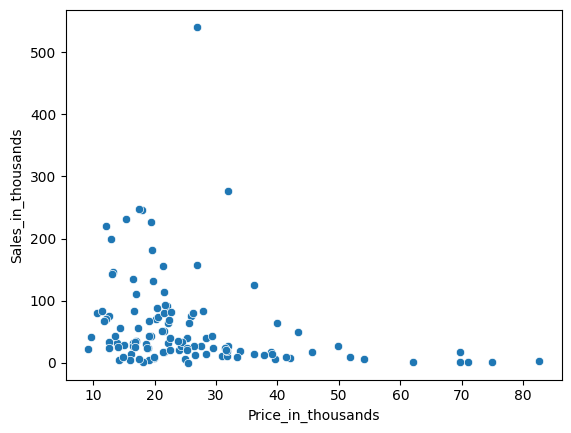

In [18]:
#melihat korelasi harga mobil dengan penjualan dengan scatter plot
sns.scatterplot(data=df_car, x='Price_in_thousands', y='Sales_in_thousands')
plt.show()

In [19]:
df_car[['Sales_in_thousands', 'Price_in_thousands']].corr()

,Sales_in_thousands,Price_in_thousands
Sales_in_thousands,1.000000,-0.251705
Price_in_thousands,-0.251705,1.000000


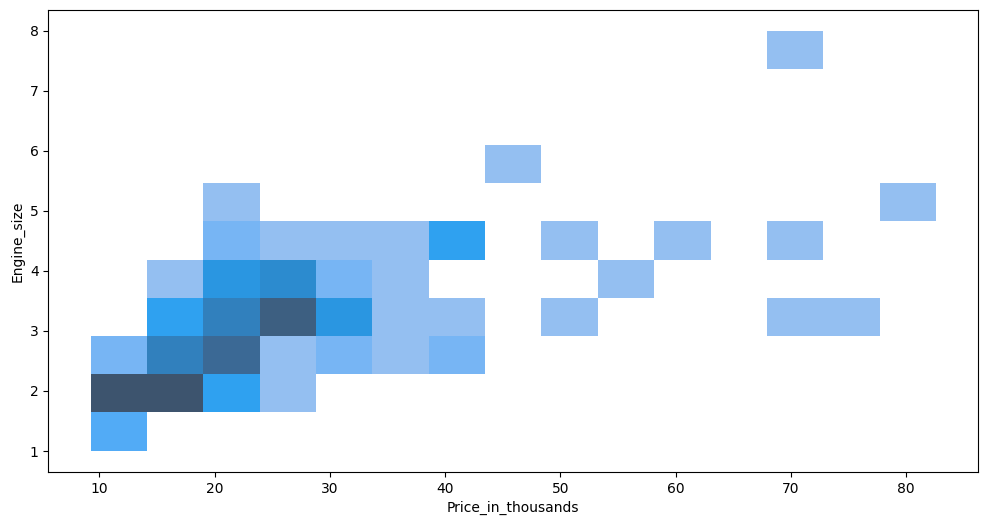

In [20]:
plt.subplots(figsize=(12,6))

sns.histplot(data=df_car, x='Price_in_thousands', y='Engine_size')
plt.show()

In [21]:
df_car[['Engine_size', 'Price_in_thousands']].corr()

,Engine_size,Price_in_thousands
Engine_size,1.00000,0.64917
Price_in_thousands,0.64917,1.00000


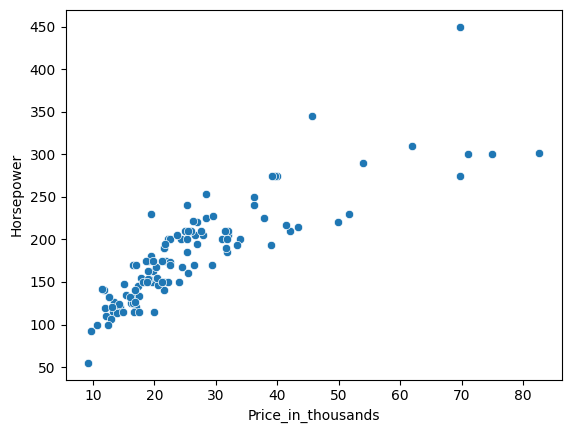

In [22]:
sns.scatterplot(data=df_car, x='Price_in_thousands', y='Horsepower')
plt.show()

In [23]:
df_car[['Horsepower', 'Price_in_thousands']].corr()

,Horsepower,Price_in_thousands
Horsepower,1.000000,0.853455
Price_in_thousands,0.853455,1.000000


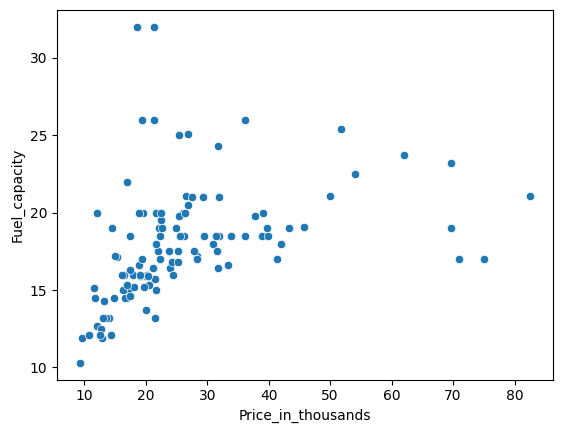

In [24]:
sns.scatterplot(data=df_car, x='Price_in_thousands', y='Fuel_capacity')
plt.show()

In [25]:
df_car[['Fuel_capacity', 'Price_in_thousands']].corr()

,Fuel_capacity,Price_in_thousands
Fuel_capacity,1.000000,0.406496
Price_in_thousands,0.406496,1.000000


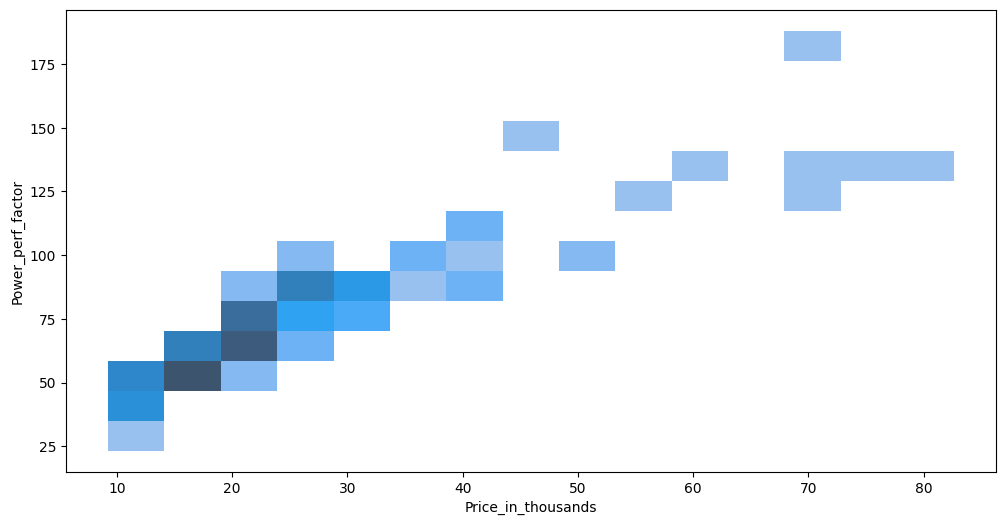

In [26]:
plt.subplots(figsize=(12,6))

sns.histplot(data=df_car, x='Price_in_thousands', y='Power_perf_factor')
plt.show()

In [27]:
df_car[['Power_perf_factor', 'Price_in_thousands']].corr()

,Power_perf_factor,Price_in_thousands
Power_perf_factor,1.000000,0.905002
Price_in_thousands,0.905002,1.000000


Train-test-split

In [28]:
#menentukan data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
x1_train = X_train[["Power_perf_factor"]]
x1_test = X_test[["Power_perf_factor"]]

Regresi Linier Sederhana

In [35]:
#pendefinisian model linreg1
linreg1 = LinearRegression()

In [36]:
linreg1.fit(x1_train, y_train)

LinearRegression()

In [37]:
linreg1.intercept_

array([-12.21854576])

In [38]:
linreg1.coef_

array([[0.51035496]])

In [39]:
linreg1_b0 = linreg1.intercept_[0]
linreg1_b1 = linreg1.coef_[0][0]

In [40]:
print("y =", linreg1_b0, "+", linreg1_b1, "x")

y = -12.21854576200148 + 0.5103549593789697 x


In [41]:
#pendefinisian y_pred1
y_pred1 = linreg1.predict(x1_test)
y_pred1

array([[38.82960815],
       [30.93967498],
       [15.64175452],
       [32.50666413],
       [31.58440804],
       [24.67519547],
       [13.86746932],
       [23.70520574],
       [19.02895749],
       [30.78116934],
       [19.68054767],
       [15.11923   ],
       [29.37167119],
       [12.26265721],
       [24.54279005],
       [17.52501758],
       [45.72726192],
       [11.73949455],
       [23.33862989],
       [ 8.18872442],
       [22.25294869],
       [26.61771634],
       [12.74157422],
       [45.88771277]])

In [42]:
#meminimalkan loss function
def least_squares_sederhana(x, y):
    n = len(y)
    x = np.array(x)
    y = np.array(y)

    sum_x = sum(x)
    sum_y = sum(y)
    sum_x2 = sum(x**2)
    sum_xy = sum(x*y)

    atas = n*(sum_xy) - (sum_x)*(sum_y)
    bawah = n * sum_x2 - (sum_x)**2
    beta1 = atas/bawah

    mean_x = sum_x / n
    mean_y = sum_y / n

    beta0 = mean_y - beta1 * mean_x

    return (beta0[0], beta1[0])
linreg2_betas = least_squares_sederhana(x1_train, y_train)
linreg2_betas

(-12.21854576200164, 0.5103549593789717)

In [43]:
linreg2_beta0, linreg2_beta1 = linreg2_betas
linreg2_betas

(-12.21854576200164, 0.5103549593789717)

In [44]:
#melakukan prediksi
y_pred2 = np.array(linreg2_beta0 + linreg2_beta1 * x1_test)
y_pred2

array([[38.82960815],
       [30.93967498],
       [15.64175452],
       [32.50666413],
       [31.58440804],
       [24.67519547],
       [13.86746932],
       [23.70520574],
       [19.02895749],
       [30.78116934],
       [19.68054767],
       [15.11923   ],
       [29.37167119],
       [12.26265721],
       [24.54279005],
       [17.52501758],
       [45.72726192],
       [11.73949455],
       [23.33862989],
       [ 8.18872442],
       [22.25294869],
       [26.61771634],
       [12.74157422],
       [45.88771277]])

In [74]:
#mean absolut y_test dan y_pred1
mean_absolute_error(y_test, y_pred1)

3.0522241559729686

In [75]:
#meankuadrat selisih y_test dan y_pred1
mean_squared_error(y_test, y_pred1)

12.944643399437254

In [76]:
#r2 score y_test dan y_pred1
r2_score(y_test, y_pred1)

0.8129705270628269

Regresi Linier Berganda

In [60]:
#pendefinisian linreg4
linreg4 = LinearRegression()

In [65]:
linreg4.fit(X_train, y_train)

LinearRegression()

In [66]:
linreg4.intercept_

array([3.38246373e-08])

In [67]:
linreg4.coef_

array([[ 1.19854194e-11,  1.48636775e-09, -6.75424334e-01,
        -9.16891265e-01,  2.35285541e-11, -2.15575469e-10,
         4.83363349e-14,  9.86826875e-09, -1.01775851e-09,
        -1.65507249e-10,  2.59231560e+00]])

In [68]:
y_pred4 = linreg4.predict(X_test)

In [69]:
y_pred4

array([[36.13500003],
       [33.94999998],
       [11.79900001],
       [31.92999999],
       [31.96499999],
       [29.29899999],
       [16.54      ],
       [19.71999999],
       [19.56500001],
       [27.88499998],
       [17.88500001],
       [16.48000001],
       [25.30999999],
       [13.10800001],
       [19.39000001],
       [21.49999998],
       [39.07999995],
       [14.9       ],
       [22.51      ],
       [10.68500002],
       [25.45      ],
       [25.34499998],
       [19.99      ],
       [39.89499987]])

In [70]:
y_test

,Price_in_thousands
54,36.135
5,33.950
63,11.799
52,31.930
12,31.965
105,29.299
87,16.540
119,19.720
45,19.565
13,27.885


In [77]:
#mean absolute y_test dan y_pred4
mean_absolute_error(y_test, y_pred4)

1.7969199165672006e-08

In [78]:
#mean squared error y_test dan y_pred4
mean_squared_error(y_test, y_pred4)

9.972334730393393e-16

In [79]:
#r2 score y_test dan y_pred4
r2_score(y_test, y_pred4)

1.0

Evaluasi model regresi

In [80]:
print("Hasil regresi linier sederhana (model linreg1)")
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("MSE", mean_squared_error(y_test, y_pred1))
print("R^2:", r2_score(y_test, y_pred1))

Hasil regresi linier sederhana (model linreg1)
MAE: 3.0522241559729686
MSE 12.944643399437254
R^2: 0.8129705270628269


didapat nilai r square yang tinggi yaitu 1 maka model regresi linier sudah cukup baik

K-Means Clustering

In [48]:
#mendefinisikan k_values
k_values = range(2, 11)

In [49]:
#melakukan grid search
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_car)
    silhouette_scores.append(silhouette_score(df_car, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [50]:
#menentukan nilai k terbaik
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Nilai k terbaik:", best_k)

Nilai k terbaik: 2


In [52]:
#modelling
clusterNum = 2
k_means_car = KMeans(init = 'k-means++', n_clusters= clusterNum, n_init = 12)
#2 cluster, dengan running algoritma sebanyak 12 kali

k_means_car.fit(X)

KMeans(n_clusters=2, n_init=12)

In [53]:
#hasil clustering
labels_car = k_means_car.labels_
print(labels_car)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1]


In [54]:
#mengevaluasi clustering dengan inertia
print(k_means_car.inertia_)

744831.4533480734


In [55]:
#menambahkan kolom hasil clustering pada dataset
df_car['Clus_km'] = labels_car
df_car.head(5)

<ipython-input-55-412537088796>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car['Clus_km'] = labels_car


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Clus_km
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,1
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,1
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,1
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,1
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,1


In [81]:
df_car.to_csv("tugas1_clusters.csv")

In [57]:
#melihat rata rata per cluster
df_car.groupby('Clus_km').mean()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Clus_km,,,,,,,,,,,,
0,215.884533,12.385667,18.967067,3.020000,158.866667,112.340000,71.906667,192.693333,3.314800,18.653333,24.066667,64.293988
1,36.057578,18.861814,26.999255,3.052941,184.578431,106.589216,71.084314,186.986275,3.325412,17.689216,24.127451,76.495176


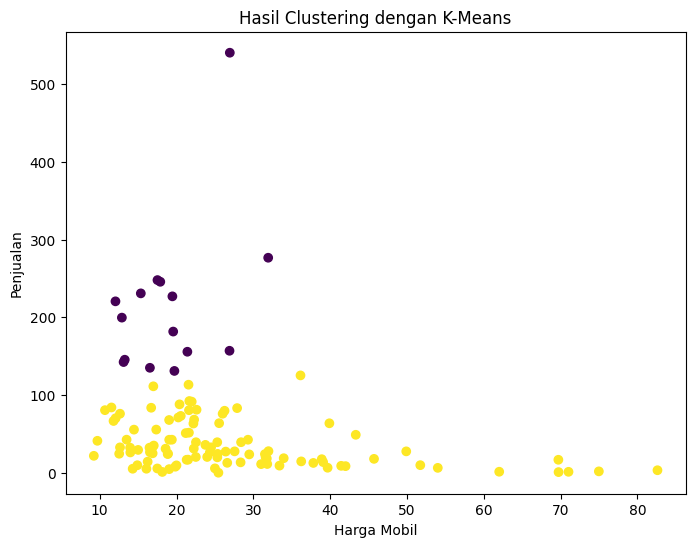

In [59]:
#plot hasil clustering berdasarkan harga mobil dan penjualan
plt.figure(figsize=(8, 6))
plt.scatter(df_car['Price_in_thousands'], df_car['Sales_in_thousands'], c=df_car['Clus_km'])
plt.xlabel('Harga Mobil')
plt.ylabel('Penjualan')
plt.title('Hasil Clustering dengan K-Means')
plt.show()

Evaluasi dengan SSE

In [90]:
  #menghitung SSE
def evaluate_kmeans(X, labels):
  sse = 0
  for label in np.unique(labels):
    cluster_mask = labels == label
    cluster_data = X[cluster_mask]
    cluster_centroid = np.mean(cluster_data, axis=0)
    distances = np.linalg.norm(cluster_data - cluster_centroid, axis=1)**2
    sse += np.sum(distances)
  return sse

In [91]:
sse_values = []
for k in k_values:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_car)
  labels = kmeans.labels_
  sse = evaluate_kmeans(df_car.values[:, 1:], labels)  # Asumsi kolom pertama adalah indeks
  sse_values.append(sse)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [92]:
print("SSE:", sse_values)

SSE: [536564.8201577737, 264344.59467055247, 147410.0568324881, 140310.3567120481, 151066.07673416624, 127388.35531902738, 121123.20644133312, 86339.2839559965, 86828.25767881214]



Kita dapat membuat 2 cluster:
*   Harga mobil rendah penjualan tinggi
*   Harga mobil tinggi penjualan rendah

